In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv('datasets/Customer-Churn-Records.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
7719,7720,15775433,Tang,666,Germany,Male,71,1,53013.29,2,1,1,112222.64,0,0,1,GOLD,419
7012,7013,15803378,Small,850,Spain,Male,44,8,0.00,2,1,1,183617.32,0,0,1,GOLD,783
9711,9712,15646366,Trevisani,521,Germany,Male,41,8,120586.54,1,0,1,20491.15,0,0,4,GOLD,486
1530,1531,15640953,Bligh,611,France,Female,26,2,107508.93,2,1,1,120801.65,0,0,4,DIAMOND,720
5698,5699,15672966,Cross,682,Spain,Female,64,9,0.00,2,1,1,103318.44,0,0,2,SILVER,614


In [44]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1, inplace=True)

In [45]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
8420,669,Spain,Male,29,9,0.00,1,1,1,93901.61,0,0,5,DIAMOND,335
2802,774,France,Male,53,4,113709.28,1,1,1,153887.93,1,1,3,PLATINUM,616
7133,743,France,Female,30,1,127023.39,1,1,1,138780.89,0,0,4,GOLD,546
1732,735,France,Male,49,5,121973.28,1,1,0,148804.36,0,0,1,DIAMOND,916
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90,0,0,1,SILVER,300


In [ ]:
plt.hist(df[['Gender', 'Geography', 'Card Type']])

In [78]:
df.groupby('Gender')['Exited'].agg('count')

Gender
0    4543
1    5457
Name: Exited, dtype: int64

In [47]:
#checking for missing values
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [48]:
#checking for duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [49]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [50]:
#here we are trying to see the unique values
multi_unique_columns = []
binary_columns = []

for col in df.select_dtypes('object'):
    no_of_unique = df[col].unique().shape[0]
    if no_of_unique >2:
        multi_unique_columns.append(col)
    elif no_of_unique == 2:
        binary_columns.append(col)

In [51]:
binary_columns, multi_unique_columns

(['Gender'], ['Geography', 'Card Type'])

In [52]:
#using label encoder to encode the binary column(s)
le = LabelEncoder()

for col in binary_columns:
    df[col] = le.fit_transform(df[col])

df[binary_columns].sample(5)

,Gender
4486,1
2156,1
8539,0
4299,1
5691,1


In [53]:
#doing one-hot encoding for non-related categorical columns
dummies = pd.get_dummies(df[multi_unique_columns])
dummies

,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,0,0,1,0,0,0
1,0,0,1,1,0,0,0
2,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...
9995,1,0,0,1,0,0,0
9996,1,0,0,0,0,1,0
9997,1,0,0,0,0,0,1
9998,0,1,0,0,1,0,0


In [54]:
df.drop(multi_unique_columns, axis=1, inplace=True)

In [55]:
df1 = pd.concat([df, dummies], axis=1)
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
4671,616,0,45,6,128352.59,3,1,1,144000.59,1,1,5,584,0,1,0,1,0,0,0
2071,686,0,36,5,0.00,2,1,1,152979.14,0,0,4,966,0,0,1,0,1,0,0
7837,850,1,48,2,0.00,1,1,0,169425.30,1,1,1,761,0,0,1,0,1,0,0
1187,765,0,50,9,126547.80,1,1,1,79579.94,1,1,1,357,1,0,0,0,0,1,0
5760,528,1,23,7,104744.89,1,1,0,170262.97,0,0,5,517,0,0,1,0,1,0,0


In [56]:
#scaling integer columns
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned', 'NumOfProducts', 'Satisfaction Score']

scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [57]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2553,0.754,1,0.716216,8,0.000000,0.000000,1,1,0.992271,1,1,0.75,0.851305,0,0,1,0,1,0,0
7831,0.798,1,0.324324,2,0.226095,0.333333,0,1,0.927747,0,0,0.25,0.928490,1,0,0,0,0,0,1
5330,0.532,1,0.148649,9,0.000000,0.000000,1,1,0.834944,0,0,0.25,0.216799,1,0,0,0,0,1,0
6424,0.786,1,0.337838,5,0.000000,0.333333,0,0,0.565392,1,1,1.00,0.321226,1,0,0,0,0,0,1
7400,0.824,1,0.229730,1,0.468152,0.000000,0,1,0.891835,1,1,0.75,0.116913,0,1,0,1,0,0,0


In [58]:
df1['NumOfProducts'].unique()

array([0.        , 0.66666667, 0.33333333, 1.        ])

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  float64
 1   Gender              10000 non-null  int32  
 2   Age                 10000 non-null  float64
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  float64
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  float64
 12  Point Earned        10000 non-null  float64
 13  Geography_France    10000 non-null  uint8  
 14  Geography_Germany   10000 non-null  uint8  
 15  Geography_Spain     10000 non-null  uint8  
 16  Card 

In [60]:
x = df1.drop(['Exited'], axis=1)
y = df1['Exited']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [64]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(x_train.shape[1],), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [65]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
235/235 [==============================] - 15s 18ms/step - loss: 0.4349 - accuracy: 0.7851
Epoch 2/5
235/235 [==============================] - 4s 16ms/step - loss: 0.0758 - accuracy: 0.9929
Epoch 3/5
235/235 [==============================] - 4s 16ms/step - loss: 0.0154 - accuracy: 0.9983
Epoch 4/5
235/235 [==============================] - 4s 17ms/step - loss: 0.0119 - accuracy: 0.9983
Epoch 5/5
235/235 [==============================] - 4s 17ms/step - loss: 0.0115 - accuracy: 0.9983


In [67]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 3s 14ms/step - loss: 0.0042 - accuracy: 0.9996


[0.004189956001937389, 0.9995999932289124]

In [68]:
yp = model.predict(x_test)

79/79 [==============================] - 2s 11ms/step


In [70]:
y_pred = []

for i in yp:
    if i < 0.5:
        y_pred.append(0)
    elif i > 0.5:
        y_pred.append(1)

In [72]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      1.00      1.00       501

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1998,    1],
       [   0,  501]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

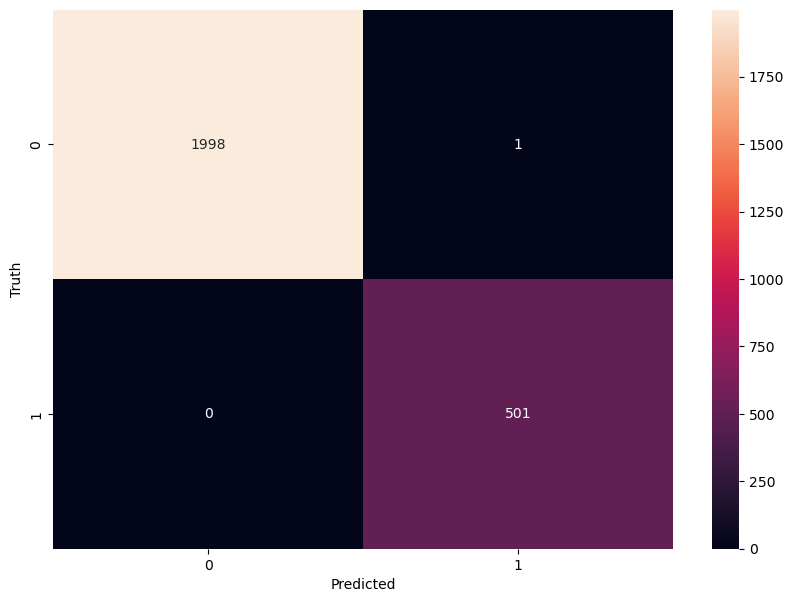

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')